In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH ="datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data (housing_url =HOUSING_URL, housing_path =HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path =os.path.join(housing_path, "housing.tgz")
    print(housing_url)
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path =housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz


In [5]:
import pandas as pd
import numpy as np

In [6]:
def load_housing_data (housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    print(csv_path)
    return pd.read_csv(csv_path)


In [7]:
housing_df = load_housing_data()

datasets/housing/housing.csv


In [8]:
housing_df = pd.read_csv("datasets/housing/housing.csv")

In [9]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


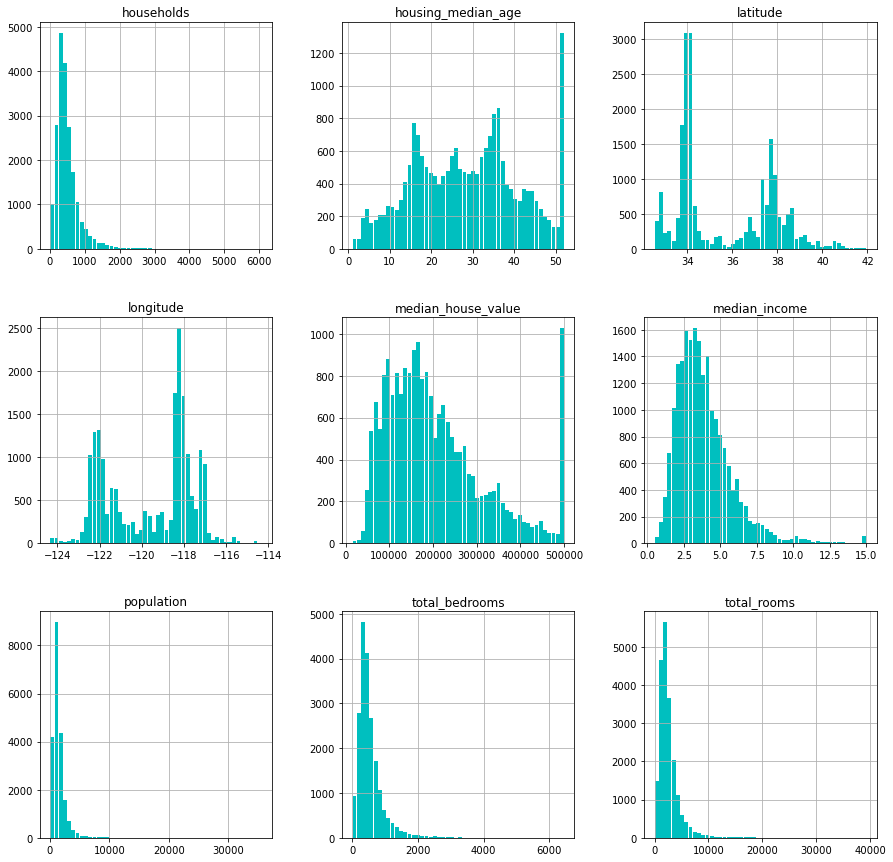

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, rwidth=0.9, figsize =(15,15), color ='c',histtype='bar')
plt.show()

In [15]:
housing_df['income_cato']= np.ceil(housing_df["median_income"]/1.5)
housing_df['income_cato'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cato, dtype: int64

In [16]:
housing_df['income_cato'].where(housing_df['income_cato']<5,5.0, inplace =True)
housing_df['income_cato'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cato, dtype: int64

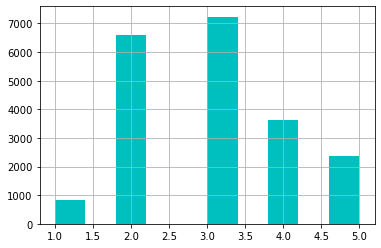

In [17]:
housing_df['income_cato'].hist(color ='c');

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
sp = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in sp.split(housing_df,housing_df['income_cato']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
    

In [20]:
housing_df['income_cato'].value_counts()*100 /len(housing_df) #checking percentage of each income category in whole dataset

3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cato, dtype: float64

In [21]:
strat_train_set['income_cato'].value_counts()*100/len(strat_train_set) #checking percentage of each income category in strat_train_set

3.0    35.059351
2.0    31.885901
4.0    17.629603
5.0    11.440165
1.0     3.984981
Name: income_cato, dtype: float64

In [22]:
strat_test_set['income_cato'].value_counts()*100/len(strat_test_set) #checking percentage of each income category in strat_test_set

3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_cato, dtype: float64

In [23]:
housing_df1 =housing_df.copy()

In [24]:
housing_df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cato
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_set,test_set =train_test_split(housing_df1,test_size =0.2, random_state =42)

In [27]:
housing_df1['income_cato'].value_counts()*100/len(housing_df1) #checking percentage of each income category in whole dataset

3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cato, dtype: float64

In [28]:
train_set['income_cato'].value_counts()*100/len(train_set) #checking percentage of each income category in train_set

3.0    34.859496
2.0    31.746609
4.0    17.853682
5.0    11.567345
1.0     3.972868
Name: income_cato, dtype: float64

In [29]:
test_set['income_cato'].value_counts()*100/len(test_set) #checking percentage of each income category in test_set

3.0    35.852713
2.0    32.437016
4.0    16.739341
5.0    10.949612
1.0     4.021318
Name: income_cato, dtype: float64

#### **From this it is clear that train_test_split has sampling bias. Hence we'll be taking only stratified train and test set.**

In [30]:
for k in (strat_train_set, strat_test_set):
    k.drop("income_cato", axis =1, inplace =True) #dropping income_cato columns in both train and test set

In [31]:
housing =strat_train_set.copy()

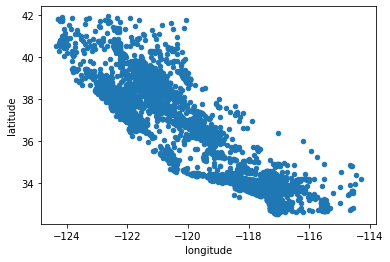

In [33]:
housing.plot(kind='scatter', x= 'longitude', y ='latitude');

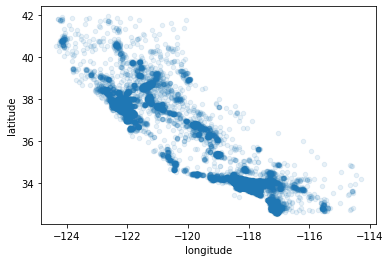

In [34]:
housing.plot(kind='scatter', x= 'longitude', y ='latitude', alpha =0.1); # displays heavy density points which displays population density

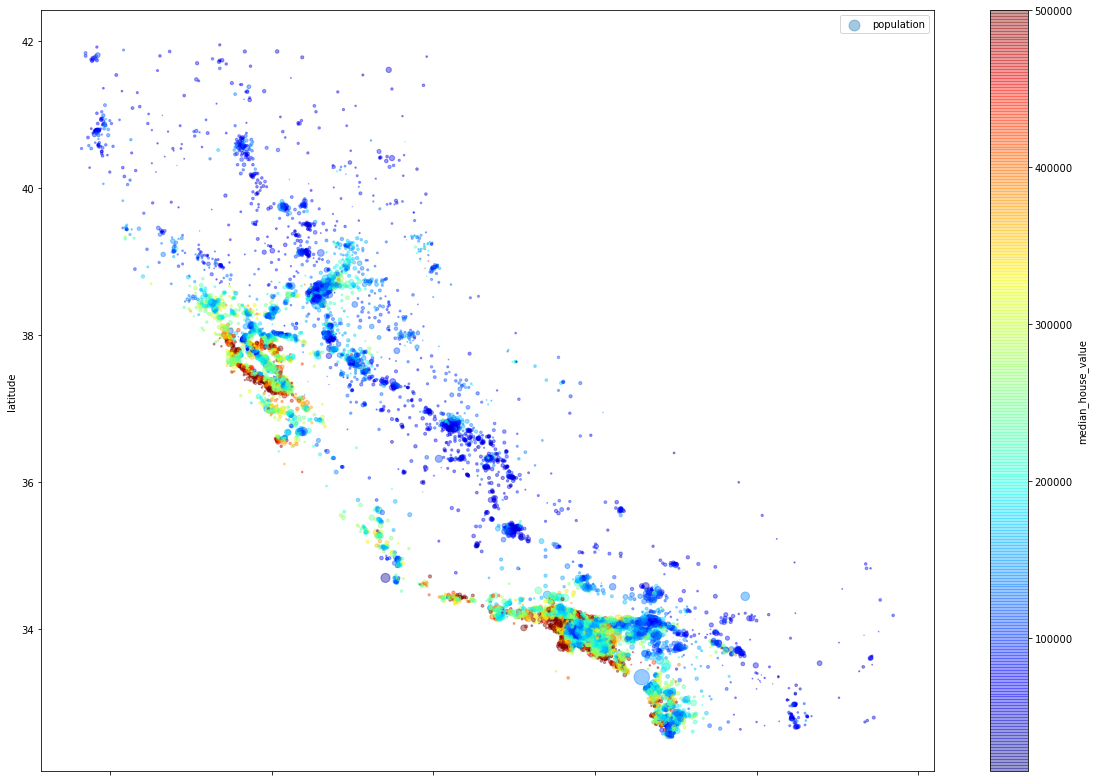

In [45]:
housing.plot(kind='scatter', x= 'longitude', y ='latitude', alpha =0.4,
             s=housing['population']/150, label ='population', figsize=(20,14), c='median_house_value', 
             cmap =plt.get_cmap('jet'), colorbar=True)
        
plt.legend();

In [46]:
corr_matrix = housing.corr()

In [52]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [56]:
from pandas.plotting import scatter_matrix

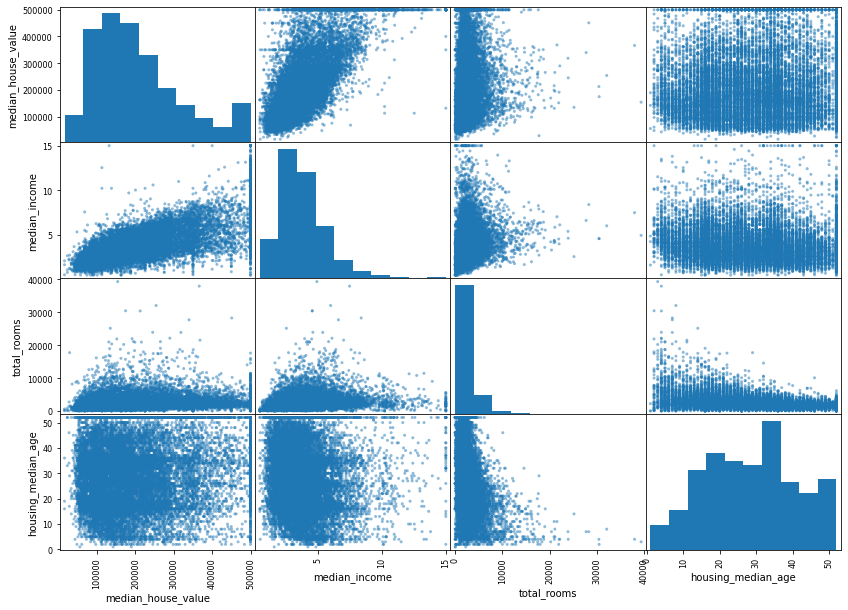

In [75]:
attributes =['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(14,10), marker='.');

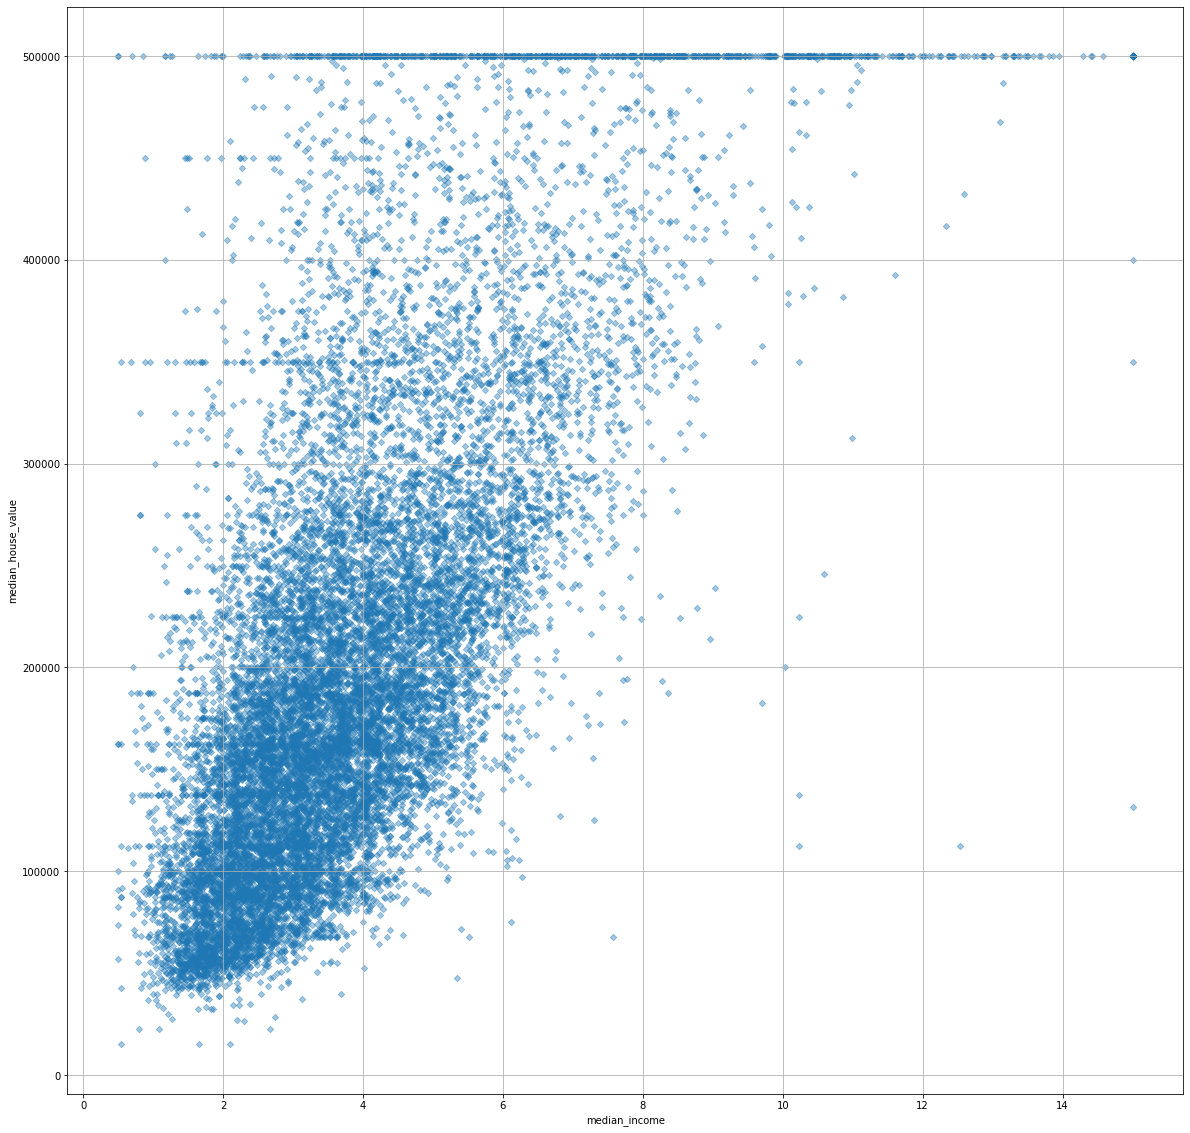

In [81]:
housing.plot(kind='scatter', x= 'median_income', y='median_house_value', figsize =(20,20), alpha =0.4, marker ='D' , grid=True)
